In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

Get data

In [21]:
link = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
df = pd.read_csv(link)

Check data structure

In [22]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Ghange type of genre column to int

In [23]:
df['n_genre'] = df['Genre']
df['n_genre'].replace({"Male", "Female"}, {0, 1}, inplace=True) #map "Male" values as 0, and "Female" values as 1
dft = df[df.columns.drop(['Genre', 'CustomerID'])] #create copy of dataframe without 'Genre' and CustomerID columns
dft.head()

,Age,Annual Income (k$),Spending Score (1-100),n_genre
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [7]:
dft

,Age,Annual Income (k$),Spending Score (1-100),n_genre
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


Visualise the data

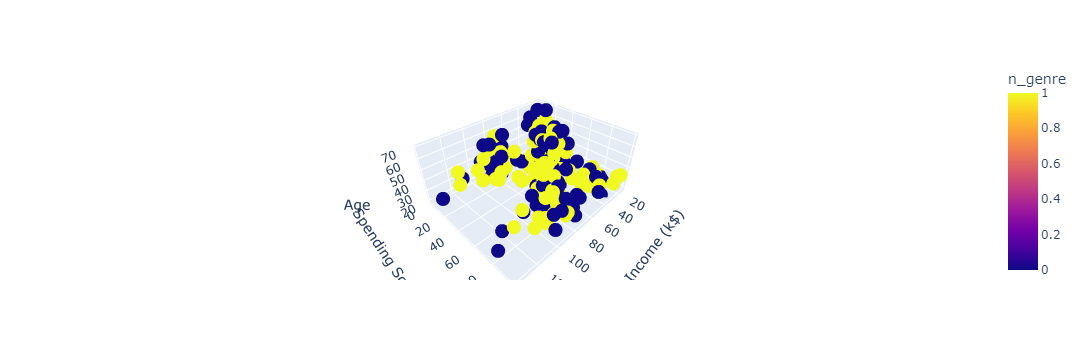

In [24]:
px.scatter_3d(df,
             x = df["Annual Income (k$)"],
             y = df["Spending Score (1-100)"],
             z = df["Age"],
             color = df["n_genre"])

Looks like the data can be splited to 5 - 7 clasters. Let's check different options

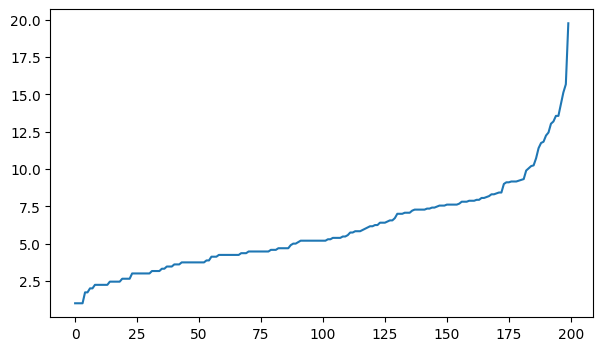

In [25]:
#find optimal eps for DBSCAN using NearestNeighbors
nn = NearestNeighbors().fit(dft)
distances, indices = nn.kneighbors(dft)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(7,4))
plt.plot(distances)

In [26]:
#As we don't have clear "knee" poitn let's try eps range 9 to 12
epss = [9, 10, 11, 12]
min_sampless = [3, 5, 10]
sil = {}

for i in epss:
    for j in min_sampless:
        mod = DBSCAN(eps=i, min_samples=j)
        mod.fit(dft)
        key = "{} + {}".format(i, j)
        sil[key] = silhouette_score(dft, mod.labels_)
print(max(sil.items()))

('9 + 5', 0.07660613388790789)


C:\Users\Дар'я\AppData\Local\Temp\ipykernel_15592\1329711544.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



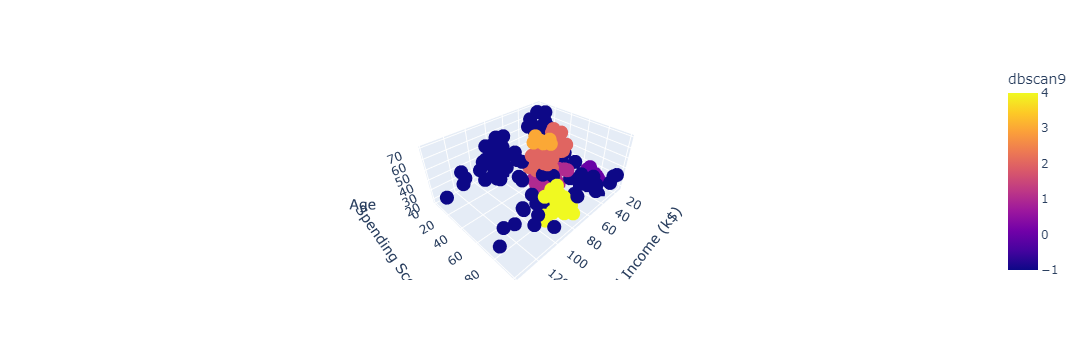

In [27]:
mod = DBSCAN(eps=9, min_samples=5)
mod.fit(dft)
dft["dbscan9"] = mod.labels_

px.scatter_3d(dft,
             x = dft["Annual Income (k$)"],
             y = dft["Spending Score (1-100)"],
             z = dft["Age"],
             color = dft["dbscan9"])

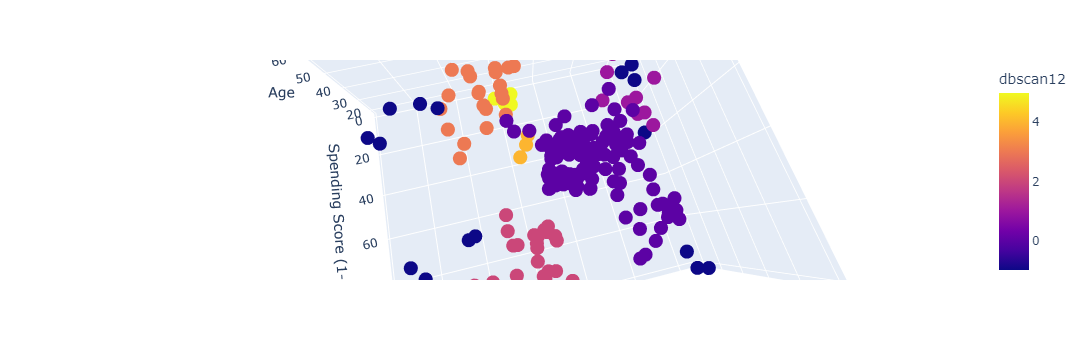

In [18]:
mod = DBSCAN(eps=12, min_samples=3)
mod.fit(dft)
dft["dbscan12"] = mod.labels_

px.scatter_3d(dft,
             x = dft["Annual Income (k$)"],
             y = dft["Spending Score (1-100)"],
             z = dft["Age"],
             color = dft["dbscan12"])

In [28]:
dft.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'n_genre',
       'dbscan9'],
      dtype='object')

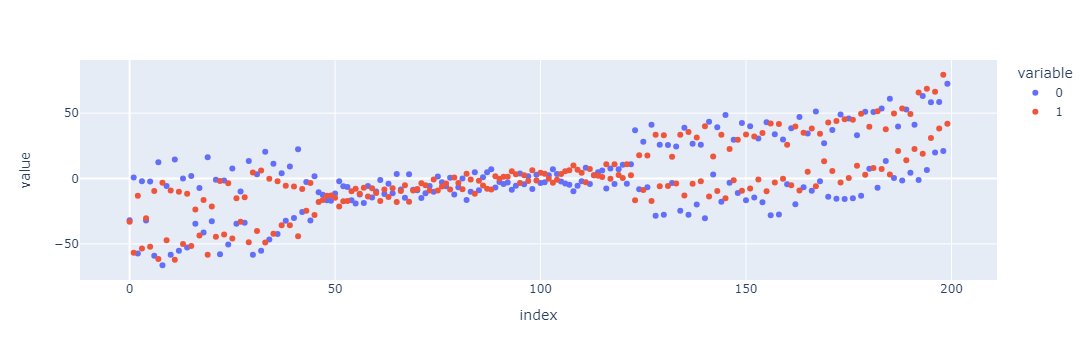

In [29]:
pca = PCA(n_components=2)
dft_tr = pca.fit_transform(dft[dft.columns.drop('dbscan9')])
px.scatter(dft_tr)

In [39]:
mod = DBSCAN(eps=9, min_samples=5)
mod.fit(dft_tr)
df_tr = pd.DataFrame(dft_tr)
df_tr["dbscan_tr"] = mod.labels_

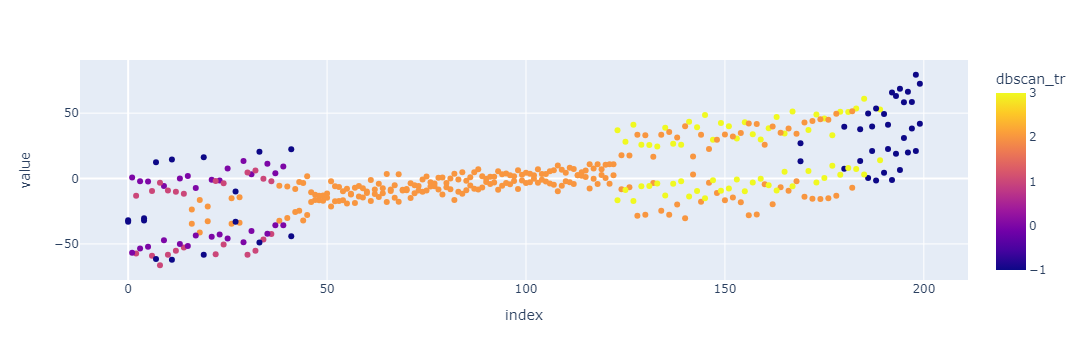

In [40]:
px.scatter(df_tr,
          color="dbscan_tr")